In [1]:
# Dependencies
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd


In [2]:
# Read property csv
property_data = pd.read_csv("Resources/Property_Data_Postcodes.csv")
property_data.drop(property_data.columns[[0,2]], axis=1, inplace=True)
property_data.columns = property_data.columns.str.removeprefix("Median ")
property_data = property_data.dropna(how="any")
property_data = property_data.set_index("locality")
property_data = property_data.astype(int)
property_data.head()

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
locality,,,,,,,,,,
Abbotsford,792500,862500,925000,1187500,1280000,1192500,1050000,1200000,1375000,1517500
Aberfeldie,947500,1045000,1207500,1300000,1471000,1498500,1390000,1520000,1880500,1575000
Aireys Inlet,664000,625500,680000,715000,737500,869000,985000,1132500,1775000,1750000
Airport West,532000,575000,635000,742000,845000,845000,795000,812500,960000,919500
Albanvale,313000,328000,345000,439000,526500,546000,512000,545000,610000,605000


In [3]:
# Add column for % increase over the decade
property_data["%_incr"] = round((property_data["2022"] - property_data["2013"]) / property_data["2013"] * 100,2)
property_data.sort_values(by="%_incr", ascending=False, inplace=True)
property_data.head()

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,%_incr
locality,,,,,,,,,,,
Bundalong,337500,336500,372500,425000,373000,462000,515000,725000,674500,3400000,907.41
Marysville,180000,125000,320000,332500,383000,477500,462500,475000,670000,980000,444.44
Flinders,765000,808000,839000,1225000,1525000,1697500,1670000,2085000,2667500,3845000,402.61
Chewton,312500,296000,369000,403500,320000,435000,439500,605000,672500,1550000,396.00
Connewarre,612500,722500,800000,892000,955000,1200000,1345000,1647500,1625000,2842500,364.08


In [4]:
# Define quartile bins and put each suburb in a bin
quartiles = property_data["%_incr"].quantile([0.25, 0.5, 0.75])
property_data.loc[property_data["%_incr"] <= quartiles[0.25], "Quartile"] = 1
property_data.loc[(property_data["%_incr"] > quartiles[0.25]) & (property_data["%_incr"] <= quartiles[0.5]), "Quartile"] = 2
property_data.loc[(property_data["%_incr"] > quartiles[0.5]) & (property_data["%_incr"] <= quartiles[0.75]), "Quartile"] = 3
property_data.loc[property_data["%_incr"] > quartiles[0.75], "Quartile"] = 4
property_data.head()

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,%_incr,Quartile
locality,,,,,,,,,,,,
Bundalong,337500,336500,372500,425000,373000,462000,515000,725000,674500,3400000,907.41,4.0
Marysville,180000,125000,320000,332500,383000,477500,462500,475000,670000,980000,444.44,4.0
Flinders,765000,808000,839000,1225000,1525000,1697500,1670000,2085000,2667500,3845000,402.61,4.0
Chewton,312500,296000,369000,403500,320000,435000,439500,605000,672500,1550000,396.00,4.0
Connewarre,612500,722500,800000,892000,955000,1200000,1345000,1647500,1625000,2842500,364.08,4.0


In [5]:
tempb = property_data.filter(items = ["Clifton Hill"], axis = 0)
tempb

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,%_incr,Quartile
locality,,,,,,,,,,,,
Clifton Hill,867000,965000,1085000,1220000,1390000,1364500,1348000,1375000,1750000,1670000,92.62,2.0


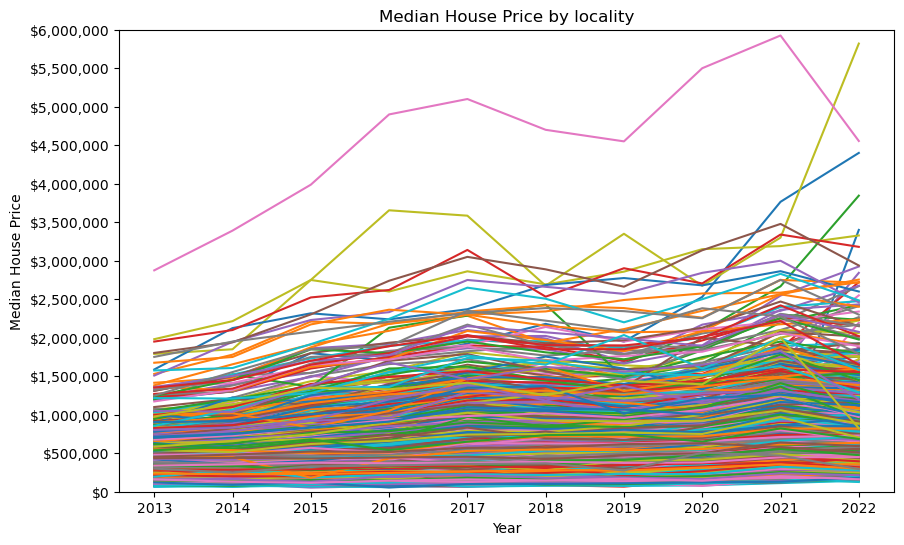

In [6]:
# Plot the median house price lines for each locality
plt.figure(figsize=(10, 6))

years = [heading for heading in property_data.columns if heading not in ["%_incr", "Quartile"]]

for locality in property_data.index:
    plt.plot(property_data.loc[locality, years])

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Median House Price')

# Set the plot title
plt.title('Median House Price by locality')

# format y-axis ticks as dollar values with commas
def currency_formatter(x, p):
    return '${:,.0f}'.format(x)

plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(currency_formatter))

plt.ylim([0, 6000000])

yticks = [i*500000 for i in range(13)]
plt.yticks(yticks)

# Show the plot
plt.show()

In [7]:
# Read property csv
crime_A_data = pd.read_csv("Resources/A Crimes against the person.csv")
crime_A_data.head()

,Year,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Count,Median
0,2013,Yarra,3067,Abbotsford,A Crimes against the person,A20 Assault and related offences,40,792500.0
1,2013,Yarra,3067,Abbotsford,A Crimes against the person,A50 Robbery,4,792500.0
2,2013,Yarra,3067,Abbotsford,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",6,792500.0
3,2013,Yarra,3067,Abbotsford,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,7,792500.0
4,2013,Yarra,3067,Abbotsford,A Crimes against the person,Other crimes against the person,4,792500.0


In [16]:
crime_A_long = crime_A_data.drop("Median", axis=1)
crime_A_long = crime_A_long.groupby(["Year", "Local Government Area", "Postcode", "Suburb/Town Name"], as_index=False)["Offence Count"].sum().sort_values(["Suburb/Town Name", "Year"])
crime_A_long.to_csv("Resources/crime_A_long.csv", index=False)
crime_A_long.head(50)

,Year,Local Government Area,Postcode,Suburb/Town Name,Offence Count
709,2013,Yarra,3067,Abbotsford,61
1464,2014,Yarra,3067,Abbotsford,65
2222,2015,Yarra,3067,Abbotsford,89
2984,2016,Yarra,3067,Abbotsford,107
3752,2017,Yarra,3067,Abbotsford,138
4514,2018,Yarra,3067,Abbotsford,100
5280,2019,Yarra,3067,Abbotsford,175
6047,2020,Yarra,3067,Abbotsford,145
6816,2021,Yarra,3067,Abbotsford,174
7569,2022,Yarra,3067,Abbotsford,181


In [31]:
years = [str(year) for year in range(2013, 2023)]
n_suburbs = crime_A_long["Suburb/Town Name"].nunique()
crime_A_wide = pd.DataFrame(index=range(n_suburbs), columns=["Suburb"] + list(years))

for i in range(0, n_suburbs, 10):
    suburb = crime_A_long.iloc[i]["Suburb/Town Name"]
    offences = crime_A_long[i:i+crime_A_long["Suburb/Town Name"].nunique()]["Offence Count"].tolist()
    print(suburb)
    print(offences)

#     n_rows = crime_A_long[crime_A_long["Suburb/Town Name"] == suburb].shape[0]
#     print(n_rows)
#     if n_rows < 10:
#          offences += [np.nan] * (10 - n_rows)
#          print(offences)
#     crime_A_wide.loc[crime_A_wide["Suburb"].isna(), "Suburb"] = suburb
#     # crime_A_wide.loc[crime_A_wide["Suburb"] == suburb, f"crime_{2013+i//10}"] = offences

crime_A_wide.dropna(subset=["Suburb"], inplace=True)

crime_A_wide.reset_index(drop=True, inplace=True)

crime_A_wide.head(50)




Abbotsford
[61, 65, 89, 107, 138, 100, 175, 145, 174, 181, 20, 24, 19, 16, 16, 14, 24, 17, 17, 24, 3, 3, 8, 14, 15, 65, 50, 54, 4, 13, 5, 8, 3, 8, 2, 4, 8, 5, 80, 56, 118, 68, 97, 94, 96, 73, 101, 109, 64, 58, 53, 59, 64, 62, 96, 86, 87, 83, 61, 45, 50, 53, 39, 61, 65, 50, 56, 51, 71, 75, 54, 84, 99, 83, 94, 74, 75, 59, 22, 44, 47, 47, 38, 43, 23, 30, 37, 20, 45, 38, 58, 64, 81, 69, 54, 66, 67, 87, 12, 7, 9, 7, 10, 12, 27, 17, 20, 14, 21, 28, 17, 26, 42, 14, 30, 43, 20, 19, 114, 101, 97, 112, 105, 149, 141, 97, 124, 133, 156, 170, 170, 161, 160, 150, 175, 132, 159, 159, 147, 209, 193, 149, 210, 168, 140, 150, 143, 113, 13, 12, 28, 15, 16, 19, 23, 17, 15, 21, 40, 24, 31, 33, 31, 39, 22, 23, 32, 29, 200, 208, 226, 217, 270, 234, 228, 230, 323, 266, 42, 41, 63, 79, 41, 73, 60, 59, 41, 47, 38, 33, 49, 69, 51, 92, 58, 59, 58, 72, 2, 2, 6, 14, 15, 27, 52, 44, 71, 84, 186, 201, 214, 217, 197, 169, 214, 187, 158, 129, 52, 43, 54, 66, 31, 66, 64, 66, 59, 80, 56, 61, 89, 74, 72, 66, 77, 81, 87, 

,Suburb,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
